# Aircraft Risk Analysis for Strategic Business Expansion

## Overview

This project aims to identify the potential risks associated with aircraft for our company's expansion
into the aviation industry by analyzing historical data on aircraft incidents,
maintenance records, and perfomance metrics. These insights will enable the company to identify low_risk
aircraft options. This data-driven approach ensures informed decision making as the company ventures into 
the aviation sector.

## Business Undestanding

This project addresses the challenge of identifying low-risk aircraft models
for the companys expansion into commercial and private aviation. Using
historical data on aircraft safety, maintenance, and performance, the analysis 
will provide actionable insights to help the head of the new aviation division 
make informed purchasing decisions. These findings  will enable the company to 
reduce operational risks and maximize return on investment.

This is a dataset from the National Transportation Safety Board, which includes aviation accident data from 1962 to 2023. This dataset covers civil aviation accidents and selected incidents in the United States and international waters.

## Research questions

1. Which aircraft models within the highest-traffic categories, such as airplanes, have the lowest rates of fatal and serious injuries?
2. What other factors  correlate with injury severity and safety records for different aircraft models?
3. What are the key factors that differentiate high-risk aircraft models from low-risk models in terms of operational risk and return on investment?


## Data Understanding

The dataset for this project, sourced from the National Transportation Safety Board (NTSB),
contains civil aviation accident records from 1962 to 2023 in the United States
and International waters.It includes data on accident dates, aircraft models, causes,
outcomes, and environmental conditions, which are key for analyzing aircraft risk.
Despite potential missing data, this comprehensive dataset is crucial for identifying
low-risk aircraft to guide the company's expansion into aviation.                                                                   
                                                                     

In [499]:
# Import libraries
import pandas as pd
import numpy as np


In [500]:
aviation_data = pd.read_csv('AviationData.csv', encoding = 'ISO-8859-1', low_memory = False)
states_data = pd.read_csv('USState_Codes.csv')

In [501]:
aviation_data

Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country   Latitude   Longitude Airport.Code  \
0      MOOSE CREEK, ID  United States        NaN         NaN          NaN   
1       BRIDGEPORT, CA  United States        NaN         NaN          NaN   
2        Saltville, VA  United States  36.922223  -81.878056          NaN   
3           EUREKA, CA  United States        NaN         NaN          NaN   
4           Canton, OH  United States        NaN         NaN          NaN   
...                ...            ...        ...         ...          ...   
88884    Annapolis, MD  United States        NaN         NaN          NaN   
88885      Hampton, NH  United States        NaN         NaN          NaN   
88886       Payson, AZ  United States    341525N    1112021W          PAN   
88887       Morgan, UT  United States        NaN         NaN          NaN   
88888       Athens, GA  United States        NaN         NaN          NaN   

      Airport.Name  ... Purpose.of.flight         Air.carrier  \
0              NaN  ...          Personal                 NaN   
1              NaN  ...          Personal                 NaN   
2              NaN  ...          Personal                 NaN   
3              NaN  ...          Personal                 NaN   
4              NaN  ...          Personal                 NaN   
...            ...  ...               ...                 ...   
88884          NaN  ...          Personal                 NaN   
88885          NaN  ...               NaN                 NaN   
88886       PAYSON  ...          Personal                 NaN   
88887          NaN  ...          Personal  MC CESSNA 210N LLC   
88888          NaN  ...          Personal                 NaN   

      Total.Fatal.Injuries Total.Serious.Injuries Total.Minor.Injuries  \
0                      2.0                    0.0                  0.0   
1                      4.0                    0.0                  0.0   
2                      3.0                    NaN                  NaN   
3                      2.0                    0.0                  0.0   
4                      1.0                    2.0                  NaN   
...                    ...                    ...                  ...   
88884                  0.0                    1.0                  0.0   
88885                  0.0                    0.0                  0.0   
88886                  0.0                    0.0                  0.0   
88887                  0.0                    0.0                  0.0   
88888                  0.0                    1.0                  0.0   

      Total.Uninjured Weather.Condition  Broad.phase.of.flight  \
0                 0.0               UNK                 Cruise   
1                 0.0               UNK                Unknown   
2                 NaN               IMC                 Cruise   
3                 0.0               IMC                 Cruise   
4                 0.0               VMC               Approach   
...               ...               ...                    ...   
88884             0.0               NaN                    NaN   
88885             0.0    

In [502]:
#Contents of the states_data dataset
states_data

US_State Abbreviation
0          Alabama           AL
1           Alaska           AK
2          Arizona           AZ
3         Arkansas           AR
4       California           CA
..             ...          ...
57  Virgin Islands           VI
58   Washington_DC           DC
59  Gulf of mexico           GM
60  Atlantic ocean           AO
61   Pacific ocean           PO

[62 rows x 2 columns]

In [503]:
# Summary of data
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [504]:
#summary of data
states_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [505]:
# statistical summary
aviation_data.describe()

Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       82805.000000          77488.000000            76379.000000   
mean            1.146585              0.647855                0.279881   
std             0.446510              5.485960                1.544084   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            349.000000              161.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          76956.000000     82977.000000  
mean               0.357061         5.325440  
std                2.235625        27.913634  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000         1.000000  
75%                0.000000         2.000000  
max              380.000000       699.000000

In [506]:
# check for null values
aviation_data.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [507]:
#check for null values
states_data.isna().sum()

US_State        0
Abbreviation    0
dtype: int64

The aviation dataset has extensive missing data in several fields, such as Latitudes, Longitudes, Aircraft categories, and weather conditions, which could limit the depth of the analysis. On the other hand, the state dataset has no missing values.

In [509]:
# checking for duplicates
aviation_data.duplicated().sum()

0

In [510]:
states_data.duplicated().sum()

0

Both datasets had no duplicates so we proceed to clean the dataset.

# Data Cleaning

## Columns to be dropped

Variables with excessive missing values and contribute less to the analysis were dropped.
These columns are latitude, longitude, airport code, airport name, schedule, aircraft category,
FAR description and carrier.


In [514]:
# Total columns in the aviation dataset
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [515]:
#Unique values in the aircraft category
aviation_data['Aircraft.Category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR'], dtype=object)

In [516]:
# Step 1: Define necessary columns
necessary_columns = [
    'Location', 'Country', 'Injury.Severity',
    'Aircraft.damage', 'Make', 'Model', 'Amateur.Built',
    'Engine.Type', 'Purpose.of.flight', 'Total.Fatal.Injuries',
    'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
    'Weather.Condition', 'Broad.phase.of.flight', 'Aircraft.Category','Event.Date', 'Event.Id'
]

# Filter dataset to keep only the necessary columns
aviation_cleaned = aviation_data[necessary_columns]

# Step 2: Handle missing values

# Fill missing categorical values with 'Unknown'
categorical_cols = [
    'Location', 'Country', 'Injury.Severity', 'Aircraft.damage', 
    'Make', 'Model', 'Amateur.Built', 'Engine.Type', 
    'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight'
]
aviation_cleaned.loc[:, categorical_cols] = aviation_cleaned[categorical_cols].fillna('Unknown')

# Fill missing numerical columns with the median
numerical_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 
                  'Total.Minor.Injuries', 'Total.Uninjured']

aviation_cleaned.loc[:, numerical_cols] = aviation_cleaned[numerical_cols].apply(lambda x: x.fillna(x.median()))

# Step 3: Drop rows with critical missing data
# For analysis, we consider 'Model' and 'Make' critical.
aviation_cleaned = aviation_cleaned.dropna(subset=['Model', 'Make'])

# Fill missing values in 'Aircraft.Category' with the mode (most frequent value)
most_frequent_category = aviation_cleaned['Aircraft.Category'].mode()[0]  # get the most frequent value (mode)
aviation_cleaned['Aircraft.Category'] = aviation_cleaned['Aircraft.Category'].fillna(most_frequent_category)



In [517]:
# Convert 'extract.Date' to datetime format and extract the year 
aviation_cleaned['Year'] = pd.to_datetime(aviation_cleaned['Event.Date']).dt.year

In [518]:
aviation_cleaned.head()

Location        Country Injury.Severity Aircraft.damage      Make  \
0  MOOSE CREEK, ID  United States        Fatal(2)       Destroyed   Stinson   
1   BRIDGEPORT, CA  United States        Fatal(4)       Destroyed     Piper   
2    Saltville, VA  United States        Fatal(3)       Destroyed    Cessna   
3       EUREKA, CA  United States        Fatal(2)       Destroyed  Rockwell   
4       Canton, OH  United States        Fatal(1)       Destroyed    Cessna   

      Model Amateur.Built    Engine.Type Purpose.of.flight  \
0     108-3            No  Reciprocating          Personal   
1  PA24-180            No  Reciprocating          Personal   
2      172M            No  Reciprocating          Personal   
3       112            No  Reciprocating          Personal   
4       501            No        Unknown          Personal   

   Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries  \
0                   2.0                     0.0                   0.0   
1                   4.0                     0.0                   0.0   
2                   3.0                     0.0                   0.0   
3                   2.0                     0.0                   0.0   
4                   1.0                     2.0                   0.0   

   Total.Uninjured Weather.Condition Broad.phase.of.flight Aircraft.Category  \
0              0.0               UNK                Cruise          Airplane   
1              0.0               UNK               Unknown          Airplane   
2              1.0               IMC                Cruise          Airplane   
3              0.0               IMC                Cruise          Airplane   
4              0.0               VMC              Approach          Airplane   

   Event.Date        Event.Id  Year  
0  1948-10-24  20001218X45444  1948  
1  1962-07-19  20001218X45447  1962  
2  1974-08-30  20061025X01555  1974  
3  1977-06-19  20001218X45448  1977  
4  1979-08-02  20041105X01764  1979

We performed data cleaning and preparation by filtering and including only columns that are of importance. Missing values in the categorical columns are replaced with the placeholder value 'Unknown' to maintain data integrity.
Missing values in numerical columns are filled with the median of the respective columns. Rows where critical columns such as model are missing are dropped. For the aircraft category column the missing values are filled with mode to ensure consistency.


In [520]:
# checking missing values
aviation_cleaned.isna().sum()

Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Aircraft.Category         0
Event.Date                0
Event.Id                  0
Year                      0
dtype: int64

We then verify the cleaned dataset.

## Merging both dataframes

In [523]:
# split the location column to get the state abbreviations
aviation_cleaned['Abbreviation'] = aviation_cleaned['Location'].apply(lambda x: x.split(',')[-1]) 

In [524]:
#
aviation_cleaned['Abbreviation'].unique()

array([' ID', ' CA', ' VA', ' OH', ' MA', ' MN', ' WA', ' NJ', ' FL',
       ' NM', ' AL', ' LA', ' TX', ' OK', ' AR', ' UT', ' AK', ' PA',
       ' MI', ' GA', ' NC', ' NY', ' MT', ' OR', ' NV', ' IN',
       'SAINT CROIX', ' AZ', ' MO', ' WY', ' IL', ' SC', ' MD', ' HI',
       ' CO', ' WV', ' MS', ' DC', ' VT', ' KS', ' NH', ' IA', ' WI',
       ' KY', ' CT', 'GULF OF MEXICO', ' TN', ' ME', 'SAN JUAN', ' SD',
       ' NE', ' RI', ' ND', 'ATLANTIC OCEAN', 'HIGH ISLAND BLK',
       'HUMA CAO', 'MUSTANG BLK A11', 'MOCA', 'WEST DELTA 105D',
       'HIGH ISLAND 389', 'WEST CAMERON #4', 'ARECIBO', ' DE', ' Bahamas',
       'CHARLOTTE AMALI', 'MISSING ACFT', 'NEAR ST. CROIX', ' BAHAMAS',
       'BUCCANEER OIL F', 'NEAR RAMEY', 'CULEBRA', 'GRAND ISLE B43Q',
       'PATILLAS', 'E. CAMERON', 'SHIPSHOAL 295', 'LAJAS', 'HIGH ISLAND',
       'Unknown', 'CABO ROJO', 'HIGH ISLAND 582', 'EUGENE ISL.BLK',
       'VIEQUES', 'EUGENE ISLAND', 'GRAND ISLE BLK', 'ST. THOMAS',
       'MANATI', ' Angola', 

In [525]:
states_data['Abbreviation'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'AS', 'GU', 'MH', 'FM', 'MP',
       'PW', 'PR', 'VI', 'DC', 'GM', 'AO', 'PO'], dtype=object)

In [526]:
#strip leading and trailing spaces
aviation_cleaned['Abbreviation'] = aviation_cleaned['Abbreviation'].str.strip()
states_data['Abrreviation'] = states_data['Abbreviation'].str.strip()

In [527]:
#filter to keep the relevant entries
aviation_cleaned = aviation_cleaned[aviation_cleaned['Abbreviation'].isin(states_data['Abbreviation'])]       

In [528]:
#merge on cleaned data
aviation_merged = aviation_cleaned.merge(states_data, on = 'Abbreviation', how = 'left')

In [529]:
#check the dataframe
aviation_merged

Location        Country Injury.Severity Aircraft.damage  \
0      MOOSE CREEK, ID  United States        Fatal(2)       Destroyed   
1       BRIDGEPORT, CA  United States        Fatal(4)       Destroyed   
2        Saltville, VA  United States        Fatal(3)       Destroyed   
3           EUREKA, CA  United States        Fatal(2)       Destroyed   
4           Canton, OH  United States        Fatal(1)       Destroyed   
...                ...            ...             ...             ...   
82157    Annapolis, MD  United States           Minor         Unknown   
82158      Hampton, NH  United States         Unknown         Unknown   
82159       Payson, AZ  United States       Non-Fatal     Substantial   
82160       Morgan, UT  United States         Unknown         Unknown   
82161       Athens, GA  United States           Minor         Unknown   

                             Make      Model Amateur.Built    Engine.Type  \
0                         Stinson      108-3            No  Reciprocating   
1                           Piper   PA24-180            No  Reciprocating   
2                          Cessna       172M            No  Reciprocating   
3                        Rockwell        112            No  Reciprocating   
4                          Cessna        501            No        Unknown   
...                           ...        ...           ...            ...   
82157                       PIPER  PA-28-151            No        Unknown   
82158                    BELLANCA       7ECA            No        Unknown   
82159  AMERICAN CHAMPION AIRCRAFT      8GCBC            No        Unknown   
82160                      CESSNA       210N            No        Unknown   
82161                       PIPER  PA-24-260            No        Unknown   

      Purpose.of.flight  Total.Fatal.Injuries  ...  Total.Uninjured  \
0              Personal                   2.0  ...              0.0   
1              Personal                   4.0  ...              0.0   
2              Personal                   3.0  ...              1.0   
3              Personal                   2.0  ...              0.0   
4              Personal                   1.0  ...              0.0   
...                 ...                   ...  ...              ...   
82157          Personal                   0.0  ...              0.0   
82158           Unknown                   0.0  ...              0.0   
82159          Personal                   0.0  ...              1.0   
82160          Personal                   0.0  ...              0.0   
82161          Personal                   0.0  ...              1.0   

       Weather.Condition  Broad.phase.of.flight Aircraft.Category  Event.Date  \
0                    UNK                 Cruise          Airplane  1948-10-24   
1                    UNK                Unknown          Airplane  1962-07-19   
2                    IMC                 Cruise          Airplane  1974-08-30   
3                    IMC                 Cruise          Airplane  1977-06-19   
4                    VMC               Approach          Airplane  1979-08-02   
...                  ...                    ...               ...         ...   
82157            Unknown                Unknown          Airplane  2022-12-26   
82158            Unknown                Unknown          Airplane  2022-12-26   
82159                VMC                Unknown          Airplane  2022-12-26   
82160            Unknown                Unknown          Airplane  2022-12-26   
82161            Unknown                Unknown          Airplane  2022-12-29   

             Event.Id  Year Abbreviation       US_State Abrreviation  
0      20001218X45444  1948           ID          Idaho           ID  
1      20001218X45447  1962           CA     California           CA  
2      20061025X01555  1974           VA       Virginia           VA  
3      20001218X45448  1977           CA     California           CA  
4      20041105X01764  1979    

In [530]:
aviation_merged['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', 'Unknown', 'Unk'], dtype=object)

In [531]:
aviation_merged['Make']

0                           Stinson
1                             Piper
2                            Cessna
3                          Rockwell
4                            Cessna
                    ...            
82157                         PIPER
82158                      BELLANCA
82159    AMERICAN CHAMPION AIRCRAFT
82160                        CESSNA
82161                         PIPER
Name: Make, Length: 82162, dtype: object

In [532]:
aviation_merged = aviation_merged.replace('Unk', 'UNK')

In [533]:
aviation_merged['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', 'Unknown'], dtype=object)

In [534]:
#Checking for missing NaN data
aviation_merged.isna().sum()

Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Aircraft.Category         0
Event.Date                0
Event.Id                  0
Year                      0
Abbreviation              0
US_State                  0
Abrreviation              0
dtype: int64

In [536]:
# drop one abbreviation column
aviation_merged = aviation_merged.drop(columns = ['Abbreviation'])

In [537]:
#check the dataframe
aviation_merged

Location        Country Injury.Severity Aircraft.damage  \
0      MOOSE CREEK, ID  United States        Fatal(2)       Destroyed   
1       BRIDGEPORT, CA  United States        Fatal(4)       Destroyed   
2        Saltville, VA  United States        Fatal(3)       Destroyed   
3           EUREKA, CA  United States        Fatal(2)       Destroyed   
4           Canton, OH  United States        Fatal(1)       Destroyed   
...                ...            ...             ...             ...   
82157    Annapolis, MD  United States           Minor         Unknown   
82158      Hampton, NH  United States         Unknown         Unknown   
82159       Payson, AZ  United States       Non-Fatal     Substantial   
82160       Morgan, UT  United States         Unknown         Unknown   
82161       Athens, GA  United States           Minor         Unknown   

                             Make      Model Amateur.Built    Engine.Type  \
0                         Stinson      108-3            No  Reciprocating   
1                           Piper   PA24-180            No  Reciprocating   
2                          Cessna       172M            No  Reciprocating   
3                        Rockwell        112            No  Reciprocating   
4                          Cessna        501            No        Unknown   
...                           ...        ...           ...            ...   
82157                       PIPER  PA-28-151            No        Unknown   
82158                    BELLANCA       7ECA            No        Unknown   
82159  AMERICAN CHAMPION AIRCRAFT      8GCBC            No        Unknown   
82160                      CESSNA       210N            No        Unknown   
82161                       PIPER  PA-24-260            No        Unknown   

      Purpose.of.flight  Total.Fatal.Injuries  ...  Total.Minor.Injuries  \
0              Personal                   2.0  ...                   0.0   
1              Personal                   4.0  ...                   0.0   
2              Personal                   3.0  ...                   0.0   
3              Personal                   2.0  ...                   0.0   
4              Personal                   1.0  ...                   0.0   
...                 ...                   ...  ...                   ...   
82157          Personal                   0.0  ...                   0.0   
82158           Unknown                   0.0  ...                   0.0   
82159          Personal                   0.0  ...                   0.0   
82160          Personal                   0.0  ...                   0.0   
82161          Personal                   0.0  ...                   0.0   

       Total.Uninjured  Weather.Condition Broad.phase.of.flight  \
0                  0.0                UNK                Cruise   
1                  0.0                UNK               Unknown   
2                  1.0                IMC                Cruise   
3                  0.0                IMC                Cruise   
4                  0.0                VMC              Approach   
...                ...                ...                   ...   
82157              0.0            Unknown               Unknown   
82158              0.0            Unknown               Unknown   
82159              1.0                VMC               Unknown   
82160              0.0            Unknown               Unknown   
82161              1.0            Unknown               Unknown   

      Aircraft.Category  Event.Date        Event.Id  Year       US_State  \
0              Airplane  1948-10-24  20001218X45444  1948          Idaho   
1              Airplane  1962-07-19  20001218X45447  1962     California   
2              Airplane  1974-08-30  20061025X01555  1974       Virginia   
3              Airplane  1977-06-19  20001218X45448  1977     California   
4              Airplane  1979-08-02  20041105X01764  1979           Ohio   
...                 ...         ...   

In [538]:
aviation_merged['Aircraft.Category'].unique()

array(['Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'ULTR'], dtype=object)

In [539]:
aviation_merged.columns

Index(['Location', 'Country', 'Injury.Severity', 'Aircraft.damage', 'Make',
       'Model', 'Amateur.Built', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Aircraft.Category', 'Event.Date', 'Event.Id',
       'Year', 'US_State', 'Abrreviation'],
      dtype='object')

In [540]:
# Save cleaned dataset as csv data
aviation_merged.to_csv('./data/aviation_cleaned.csv')


In [541]:
# checking for missing values
aviation_merged.isna().sum()

Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Aircraft.Category         0
Event.Date                0
Event.Id                  0
Year                      0
US_State                  0
Abrreviation              0
dtype: int64

We extract the state abbreviation from the location column in the aviation data frame. We then remove any leading or trailing spaces from the abbreviation column
to ensure consitent formatting.We then filter to include rows where the abbreviation exists in the states_data dataframe.
We then combine data from both dataframes based on state abbreviations.
We replace all 'Unk' to uppercase for consistency. We removed the abbreviation column from the dataframe
since it is no longer needed after the merge operation.

# Data Analysis

In [544]:
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

## Total injuries by Aircraft Category

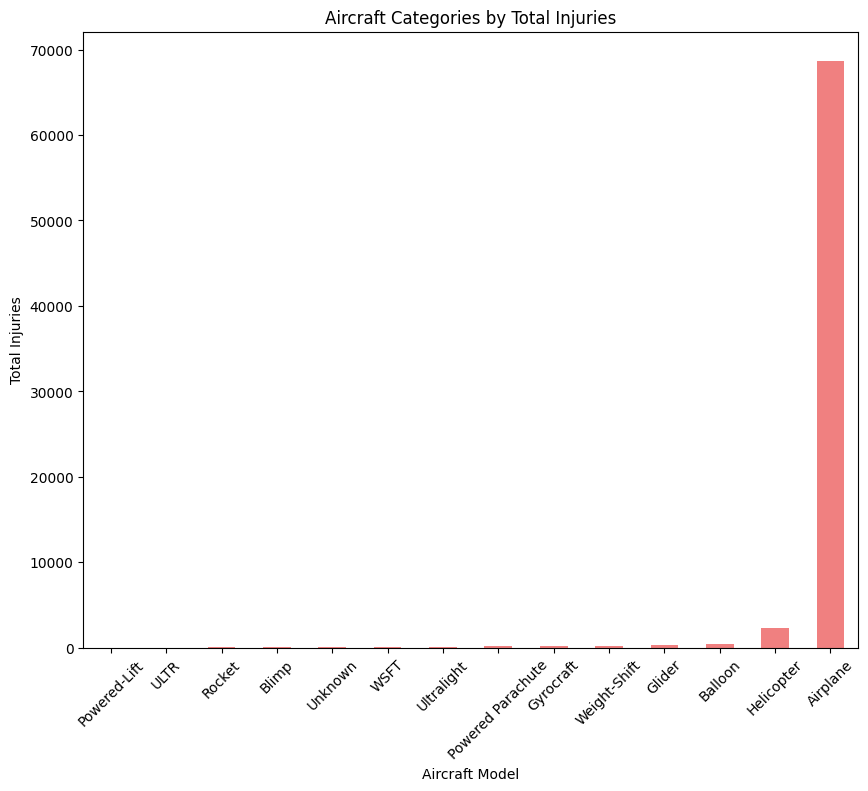

In [546]:
model_injuries = aviation_merged.groupby('Aircraft.Category')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

# Plot bar chart for total injuries by model
model_injuries['Total_Injuries'] = model_injuries.sum(axis=1)
model_injuries = model_injuries.sort_values('Total_Injuries', ascending=True).head(15)

plt.figure(figsize=(10, 8))
model_injuries['Total_Injuries'].plot(kind='bar', color='lightcoral')
plt.title('Aircraft Categories by Total Injuries')
plt.ylabel('Total Injuries')
plt.xlabel('Aircraft Model')
plt.xticks(rotation=45)
plt.show()


The analysis examines total injuries by aircraft categories, revealing significant differences in safety records. The Airplane category has the highest number of injuries, highlighting potential safety concerns, while other categories like Helicopter also have notable injuries but significantly fewer than Airplanes. 

## Aircraft Damage Distribution

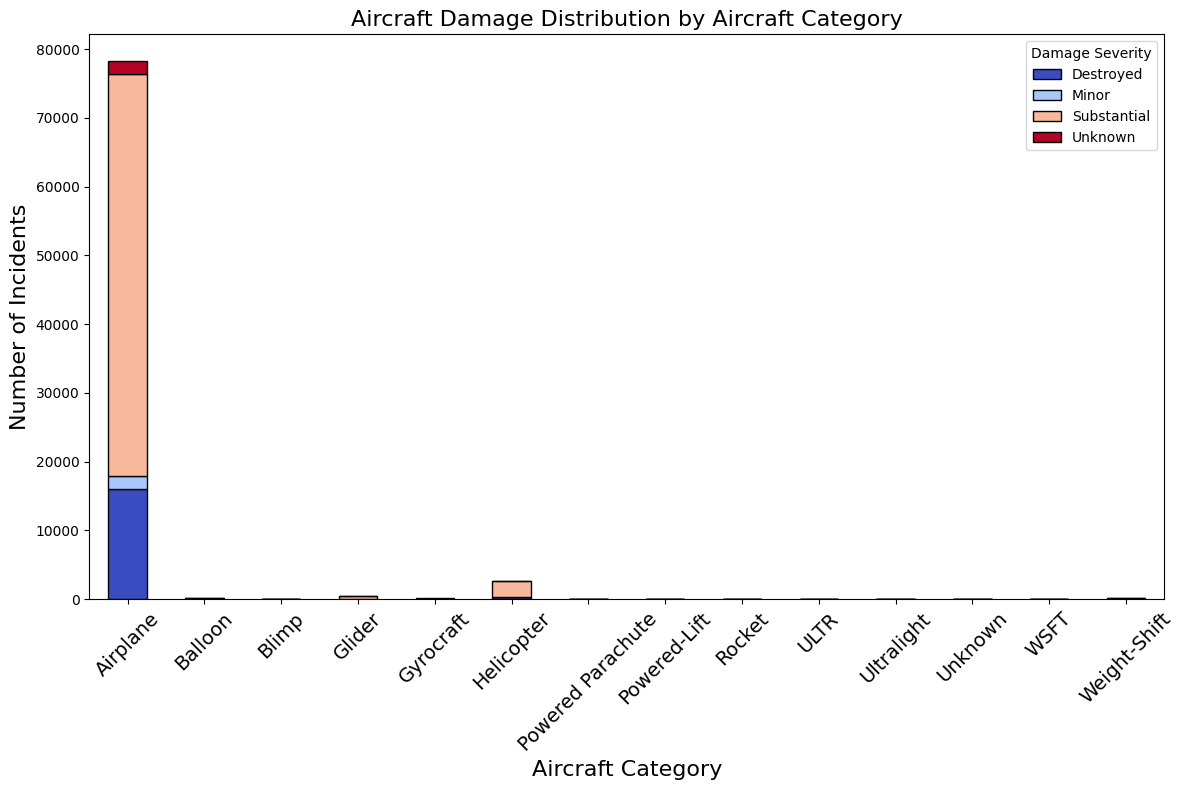

In [549]:
# Group the data by Aircraft Category and Aircraft Damage
damage_distribution = aviation_merged.groupby(['Aircraft.Category', 'Aircraft.damage']).size().unstack(fill_value=0)

# Plot a stacked bar chart to show the distribution of aircraft damage
damage_distribution.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 8), 
    cmap='coolwarm', 
    edgecolor='black'
)

# Customize the chart
plt.title('Aircraft Damage Distribution by Aircraft Category', fontsize=16)
plt.xlabel('Aircraft Category', fontsize=16)
plt.ylabel('Number of Incidents', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.legend(title='Damage Severity', loc='upper right', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


The analysis examines the distribution of aircraft damage incidents by aircraft category, highlighting that airplanes are involved in most incidents, with substantial damage being the most common type. Other categories, like helicopters and gliders, have significantly fewer incidents, with helicopters showing a noticeable number of substantial damage incidents.

## Number of incidents across various aircraft categories under different weather conditions

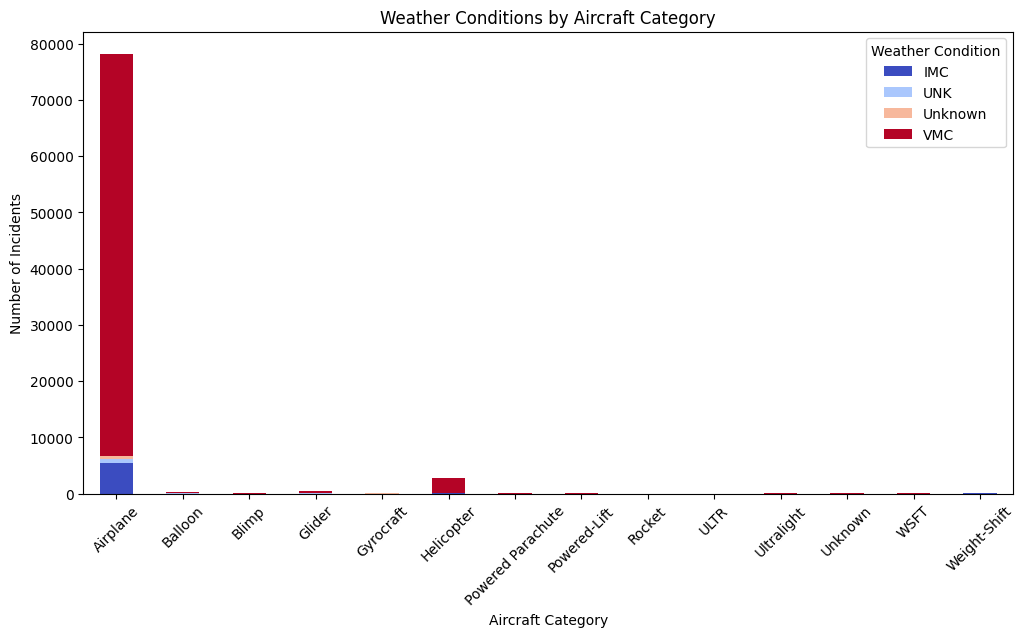

In [552]:
# Group by Aircraft Category and Weather Condition to see how they relate to incidents
weather_by_category = aviation_merged.groupby(['Aircraft.Category', 'Weather.Condition']).size().unstack(fill_value=0)

# Plot a stacked bar chart for weather conditions by aircraft category
weather_by_category.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='coolwarm')
plt.title('Weather Conditions by Aircraft Category')
plt.ylabel('Number of Incidents')
plt.xlabel('Aircraft Category')
plt.xticks(rotation=45)
plt.legend(title='Weather Condition')
plt.show()


The analysis examines the distribution of weather conditions by aircraft category, highlighting that airplanes experience the highest number of incidents, primarily under (VMC) conditions. Helicopters also show a notable number of incidents, but significantly fewer than airplanes.

## Non-fatal Injury Rates by Aircraft Model

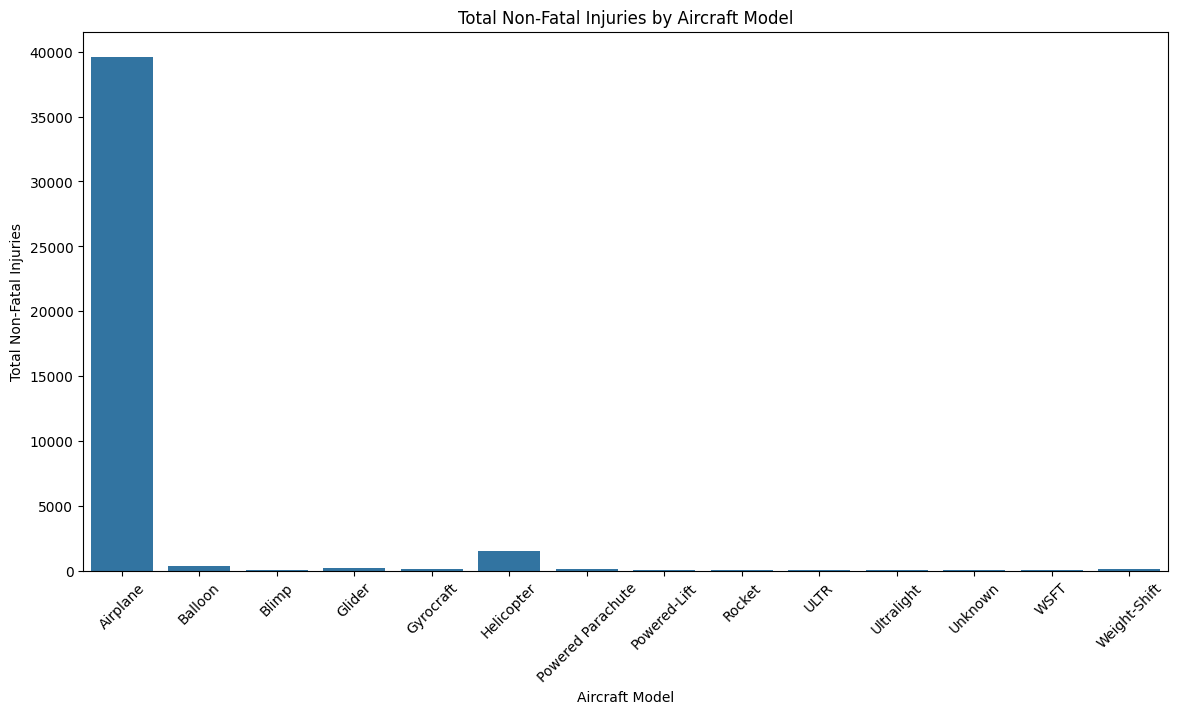

In [556]:
# Calculate total non-fatal injuries for each model
aviation_merged['Total.NonFatal.Injuries'] = aviation_merged['Total.Serious.Injuries'] + aviation_merged['Total.Minor.Injuries']

# Group by model and sum the non-fatal injuries
total_non_fatal_injuries_by_model = aviation_merged.groupby('Aircraft.Category')['Total.NonFatal.Injuries'].sum().reset_index()

# Bar plot for total non-fatal injuries by model
plt.figure(figsize=(14, 7))
sns.barplot(data=total_non_fatal_injuries_by_model, x='Aircraft.Category', y='Total.NonFatal.Injuries')
plt.title('Total Non-Fatal Injuries by Aircraft Model')
plt.xlabel('Aircraft Model')
plt.ylabel('Total Non-Fatal Injuries')
plt.xticks(rotation=45)
plt.show()


The bar chart compares the number of non-fatal injuries across various aircraft models. Airplanes have the highest number of non-fatal injuries, nearing 40,000, indicating a significant disparity compared to other aircraft types. Helicopters are second but with far fewer non-fatal injuries, while other aircraft models like Balloons, Gliders, and Ultralights have relatively low numbers of non-fatal injuries. 

## Incidents over the years

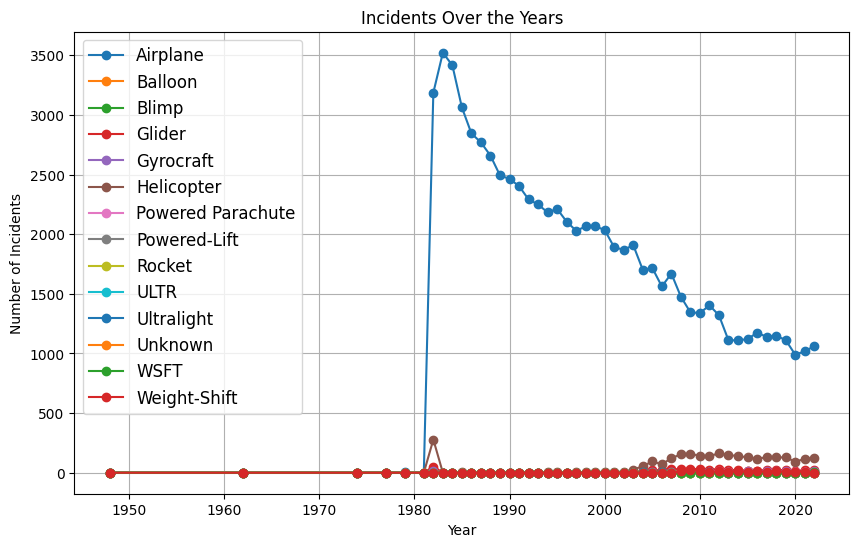

In [559]:
# Count incidents per year
incidents_per_year = aviation_merged.groupby(['Year', 'Aircraft.Category']).size().unstack(fill_value=0)

#Plot the data 
plt.figure(figsize=(10, 6)) 

#plt.plot(incidents_per_year.index, incidents_per_year.values, marker='o') 
for category in incidents_per_year.columns: 
    plt.plot(incidents_per_year.index, incidents_per_year[category], marker='o', label = category)

plt.title('Incidents Over the Years') 
plt.xlabel('Year')
plt.ylabel('Number of Incidents') 
plt.legend( fontsize = 12)
plt.grid(True) 

plt.show()

 The analysis reveals a downward trend in the number of accidents involving airplanes over the years. This indicates that, despite fluctuations in overall aviation incidents, airplanes have experienced a reduction in accidents, which could be attributed to improved safety measures, better maintenance practices, or other operational improvements within the aviation industry.

## Comparison of various injuries on varioue Aircraft Categories

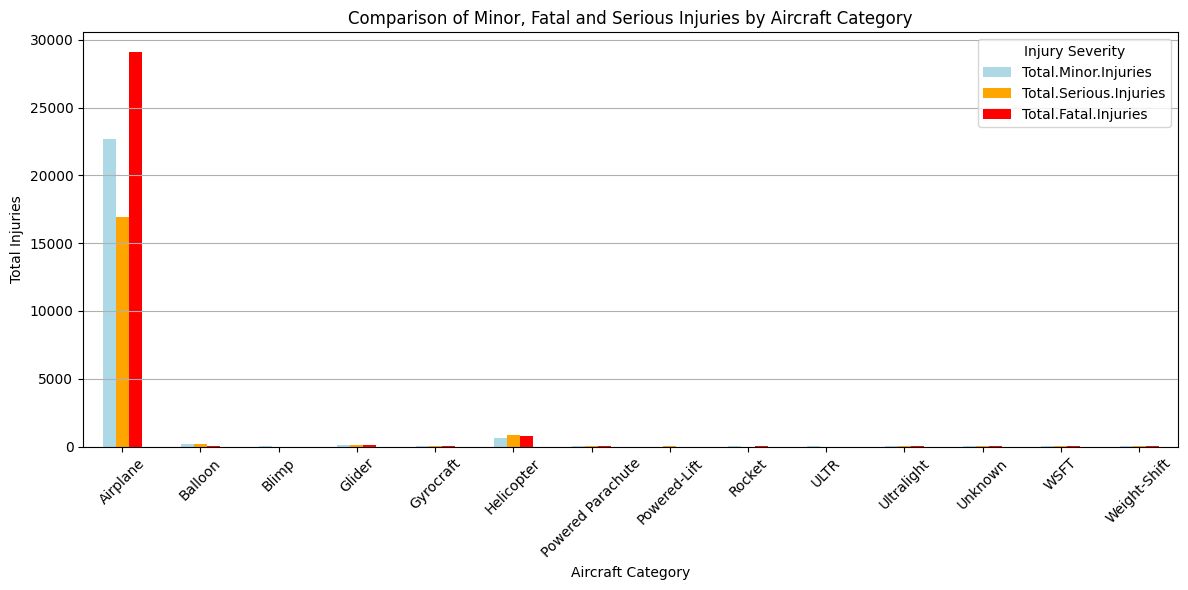

In [564]:
# Group the data by Aircraft Category and sum Minor and Serious Injuries
category_injuries = aviation_merged.groupby('Aircraft.Category')[['Total.Minor.Injuries', 'Total.Serious.Injuries', 'Total.Fatal.Injuries']].sum()

# Plotting the bar chart for Minor and Serious Injuries by Aircraft Category
category_injuries.plot(kind='bar', figsize=(12, 6), color=['lightblue', 'orange', 'red'])

# Customize the plot
plt.title('Comparison of Minor, Fatal and Serious Injuries by Aircraft Category')
plt.xlabel('Aircraft Category')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.legend(title='Injury Severity')
plt.grid(True, axis='y')

# Show the plot
plt.tight_layout()
plt.show()


The airplane category has the highest number of injuries across all severity levels, with minor injuries being the most frequent, followed by fatal injuries, and then serious injuries. This indicates that the airplane category sees more frequent incidents, likely due to higher traffic volumes.Categories like Helicopter, Ultralight, and Glider have significantly fewer injuries compared to airplanes. Helicopters show a noticeable number of injuries but still far less than airplanes.Categories such as Balloon, Blimp, Gyrocraft, Powered Parachute, and Rocket have relatively low numbers of injuries, indicating either fewer incidents or less frequent usage.


##  Conclusions

There is high traffic volumes in the airplane category meaning naturally there is a higher number of both non_fatal and fatal injuries simply due to the large number of flights and passengers compared to other aircraft categories. Here are recommendations according to our findings:

Incident Trends - Airplanes, despite their high traffic volume, have shown a steady decline in incidents over the years. This highlights improvements in safety protocols but also emphasizes the need for consistent maintenance and operational oversight.



Aircraft Categories- While airplanes have the highest usage, other categories like helicopters and gliders show varying levels of risk. Buyers should consider the specific operational demands and safety records of each category.



Safety Factors- Incidents occur even in favorable weather (VMC), suggesting that safety protocols and pilot training are essential regardless of conditions.



## Next steps

Furthes analyses could yield addditional insights to further improve operations :

1. Investigate the correlation between specific weather conditions (e.g., turbulence, crosswinds) and incidents and build predictive models to identify risk-prone weather scenarios and recommend strategies to mitigate these risks (e.g., rerouting flights).

2. Create interactive dashboards for exploring safety performance across aircraft categories, models, and flight phases.
Visualize trends in traffic volume, injury severity over the years